
# 📘 Module 20: AdaBoost (Adaptive Boosting) – Practice Notebook

This is a **full practice notebook with detailed guidance and TODO blocks**.


## 0. Notebook Setup

We start by importing all required libraries.  


In [1]:
# TODO: Import all required libraries (Done for you)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. Understanding the Dataset

You can begin with a **synthetic binary classification dataset**. or with any exisiting dataset.

Focus questions:
- Are the classes easily separable?
- Will a weak learner struggle?


In [4]:
# TODO: Generate a binary classification dataset
# Hint:
# - n_samples around 500
# - n_features = 2
# - class_sep > 1
X,y = make_classification(
    n_samples = 500,
    class_sep = 1.5,
    n_features = 2,
    random_state = 42,
    n_informative=2,
    n_redundant=0
)


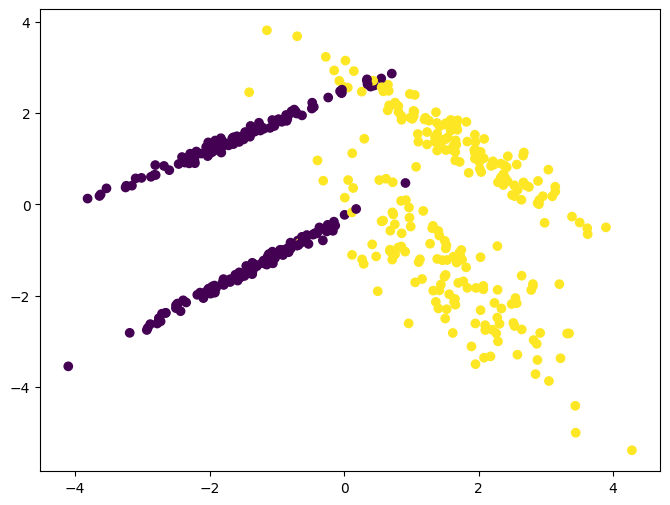

In [5]:
# TODO: Visualize the dataset using a scatter plot
# Color points by class label

# plt.scatter(...)
# plt.show()
plt.figure(figsize = (8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.show()


## 2. Train–Test Split

Before any model training, we split the data.

Why?
- To evaluate generalization
- To avoid lying to ourselves

Standard split:
- 70% training
- 30% testing


In [6]:
# TODO: Split the dataset into training and testing sets
# Use test_size=0.3 and random_state=42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)



## 3. Baseline Weak Learner (Decision Stump)

Before AdaBoost, we test **one weak learner alone**.

We intentionally restrict the model:
- max_depth = 1
- This is called a **decision stump**

Expectation:
- Accuracy will not be impressive
- That is the point


In [17]:
# TODO: Create a DecisionTreeClassifier with max_depth=1
# SVM, Logistic Regression
# This is our weak learner
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt_stump_acc = accuracy_score(y_test,y_pred)
dt_stump_acc

0.96

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test,y_pred)

0.9466666666666667

In [10]:
svc = SVC(kernel = 'linear',C=1.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9533333333333334


## 4. AdaBoost Classifier – Core Practice

Now we combine **many weak learners** using AdaBoost.

Key idea:
- Each learner focuses more on previous mistakes
- Misclassified samples get more attention
- Correctly classified samples slowly matter less


In [19]:
# TODO: Initialize AdaBoostClassifier
# Use:
base_estimator = dt
n_estimator = 50
learning_rate = 1.0

In [20]:
# TODO: Train AdaBoost on training data
# TODO: Predict on test data
# TODO: Evaluate accuracy
# TODO: Print classification report
ab = AdaBoostClassifier(
    estimator = base_estimator,
    n_estimators = n_estimator,
    learning_rate=learning_rate
)
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
ab_acc = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.96



## 5. Weak Learner vs AdaBoost Comparison

Now we compare:
- One weak learner
- Many weak learners working together

Expectation:
- AdaBoost should outperform a single stump
- If not, something is wrong


In [21]:
# TODO: Create a comparison table
# Columns:
# - Model
# - Accuracy
print('stump accuracy',dt_stump_acc)
print('AdaBoost accuracy',ab_acc)

stump accuracy 0.96
AdaBoost accuracy 0.96



## 6. Effect of Number of Estimators

AdaBoost performance depends heavily on:
- Number of estimators

More is not always better.

Your job:
- Experiment
- Observe
- Plot


In [24]:
# TODO: Try different n_estimators values
# Example: [5, 10, 20, 50, 100]

# Store accuracy for each value
estimators = list(range(5,50))
acc = []
for i in estimators:
    model = AdaBoostClassifier(
        n_estimators = i,
        learning_rate = 1.0
    )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

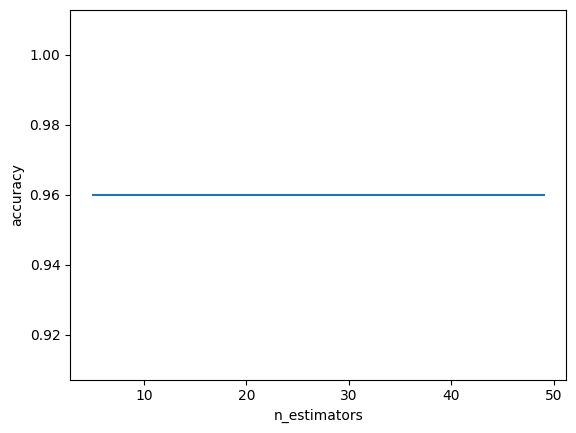

In [25]:
# TODO: Plot n_estimators vs accuracy
# Label axes clearly
plt.plot(estimators,acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()


## 7. Effect of Learning Rate

Learning rate controls **how aggressively** AdaBoost updates sample weights.

Intuition:
- High learning rate → fast but risky
- Low learning rate → slow but stable

You will verify this experimentally.


In [32]:
# TODO: Experiment with different learning_rate values
# Example: [0.01, 0.1, 0.5, 1.0]
lr_rate = [x/10 for x in range(1,20)]
acc = []
for i in lr_rate:
  model = AdaBoostClassifier(
      n_estimators = 50,
      learning_rate = i
  )
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))


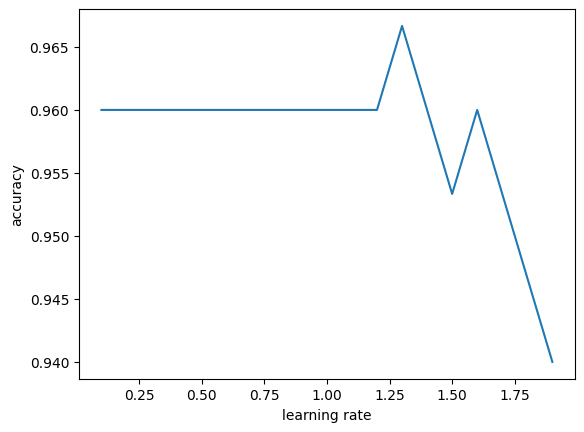

In [33]:
plt.plot(lr_rate,acc)
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()


## 8. Feature Importance in AdaBoost

AdaBoost can tell us:
- Which features were more influential

This depends on:
- How often a feature is used in splits
- How strong the corresponding learners were


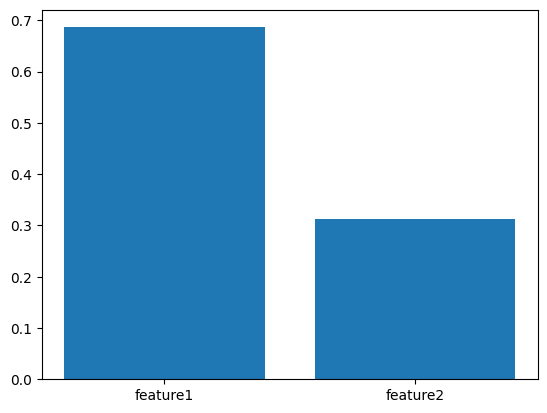

In [38]:
# TODO: Extract feature importance from AdaBoost
# TODO: Plot feature importance
importance = ab.feature_importances_
plt.bar(['feature1','feature2'],importance)
plt.show()


## 9. Reflection (Mandatory)

Answer in your own words.

1. Why is AdaBoost called *adaptive*?
2. What happens to misclassified samples after each iteration?
3. Why do we prefer weak learners instead of strong ones?
4. When should AdaBoost not be used?



## 10. Bonus Challenge (Optional)

Replace the decision stump with **Logistic Regression** as the base estimator.

Questions:
- Does AdaBoost still work?
- Should you do this in practice?
- Why or why not?


In [40]:
# TODO: Replace DecisionTreeClassifier with LogisticRegression or SVM
# Train AdaBoost again
# Compare performance
stump = SVC(kernel = 'linear',C=1.0)
ab = AdaBoostClassifier(
    estimator = stump,
    n_estimators = 50,
    learning_rate = 1.25)
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
accuracy_score(y_test,y_pred)

0.9466666666666667